<a href="https://colab.research.google.com/github/pallabpuri/DataSciencehub/blob/master/Stock_Market_Data_Analysis_for_Google%2CAmazon%2CApple_and_Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install quandl


  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
#importing required libraries
import quandl
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [0]:
#using API key from quandl to access data. An API key can be obtained by signing up on www.quandl.com
quandl.ApiConfig.api_key='B2-zHMCCNvE3cZt7xsV9'

In [0]:
#initializing dates to fetch data for Apple, Amazon, Microsoft and Google.
stock_list=['AAPL','AMZN','MSFT','GOOG']
start=datetime(2017,2,15)
end=datetime.now()

In [0]:
#fetching data
file=quandl.get_table('WIKI/Prices',ticker=stock_list,date={'gte':start,'lte':end},paginate=True).set_index("date")

In [23]:
file.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-27,MSFT,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
2018-03-26,MSFT,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-23,MSFT,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-22,MSFT,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-21,MSFT,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


In [0]:
AAPL=file[file.ticker=="AAPL"]
AMZN=file[file.ticker=="AMZN"]
MSFT=file[file.ticker=="MSFT"]
GOOG=file[file.ticker=="GOOG"]

In [0]:
df_AAPL=AAPL["adj_close"]

In [27]:
#viewing values of apples stock
df_AAPL.head()

date
2018-03-27    168.340
2018-03-26    172.770
2018-03-23    164.940
2018-03-22    168.845
2018-03-21    171.270
Name: adj_close, dtype: float64

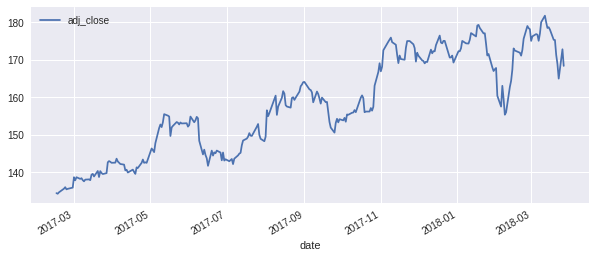

In [28]:
#plotting apples closing price
df_AAPL.plot(legend=True,figsize=(10,4))

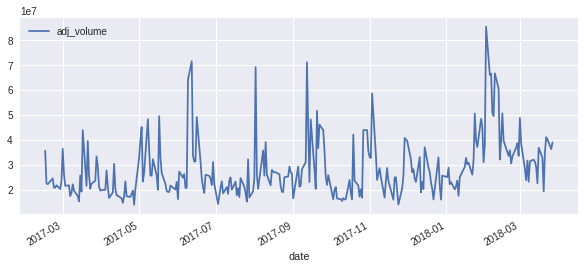

In [29]:
#Viewing stock trade of apple by volume
AAPL['adj_volume'].plot(legend=True,figsize=(10,4))

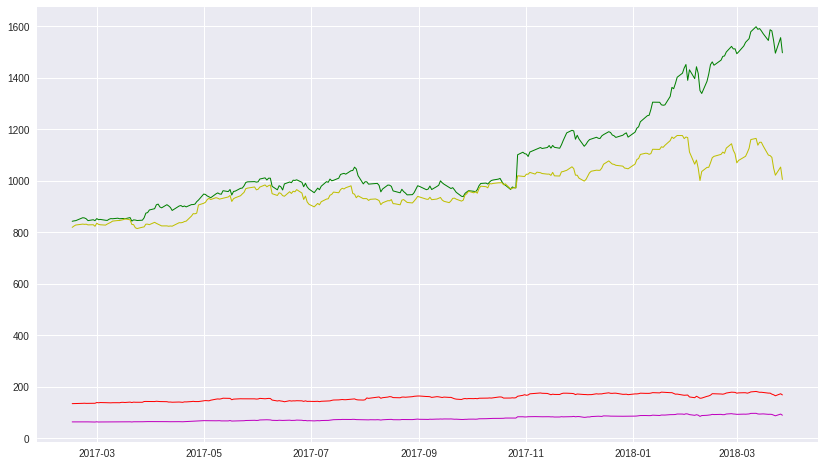

In [30]:
#plotting closing prices for all the 4 companies
plt.figure(figsize=(14,8))
plt.plot(AAPL['adj_close'],'r',label="Apple",linewidth=1)
plt.plot(AMZN['adj_close'],'g',label="Amazon",linewidth=1)
plt.plot(GOOG['adj_close'],'y',label="Google",linewidth=1)
plt.plot(MSFT['adj_close'],'m',label="Microsoft",linewidth=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


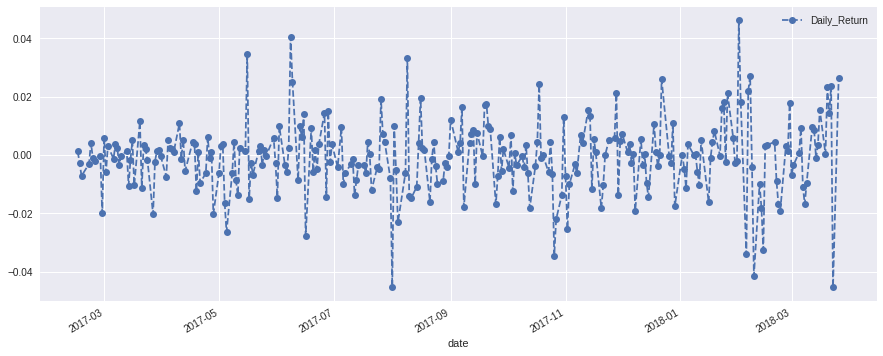

In [32]:
#Daily return analysis of apple's stock and percentage change
AAPL['Daily_Return']=AAPL['adj_close'].pct_change()
AAPL['Daily_Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')

In [0]:
#joint plot for apple and googles closing price.
closing_price_stock=quandl.get_table('WIKI/Prices',ticker=stock_list,qopts={'columns':['ticker','date','adj_close']},date={'gte':start,'lte':end},paginate=True).pivot(index='date',columns='ticker',values='adj_close')

In [34]:
closing_price_stock.head()

ticker,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-02-15,134.412350,842.70,818.98,63.508020
2017-02-16,134.248686,844.14,824.16,63.498178
2017-02-17,134.620649,845.07,828.07,63.596595
2017-02-21,135.592711,856.44,831.66,63.468654
2017-02-22,135.999390,855.61,830.76,63.340712


In [0]:
stock_returns=closing_price_stock.pct_change()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


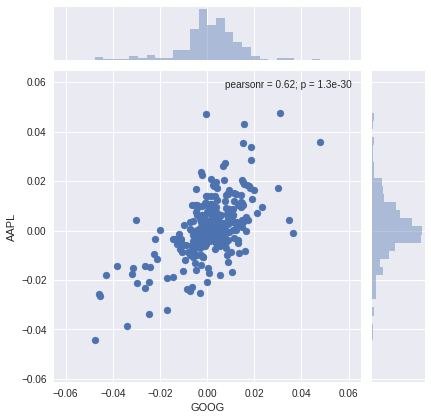

In [36]:
sns.jointplot('GOOG','AAPL',stock_returns,kind='scatter')

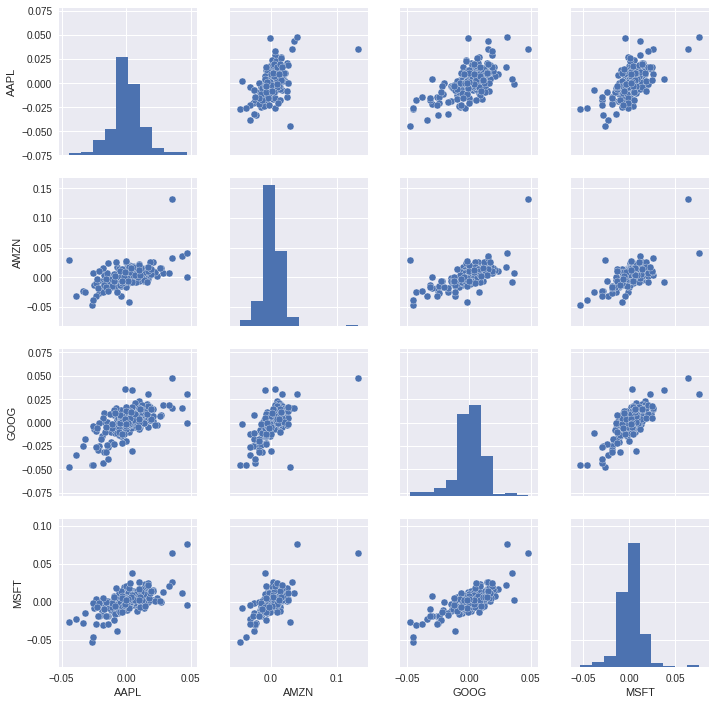

In [38]:
#pairplot for all the stocks
sns.pairplot(stock_returns.dropna())

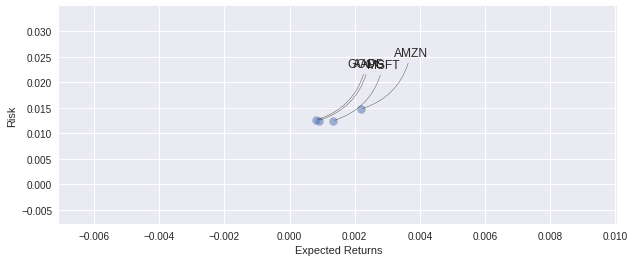

In [41]:
#Risk Analysis
returns=stock_returns.dropna()
area=np.pi*20
plt.figure(figsize=(10,4))
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label,x,y in zip(returns.columns,returns.mean(),returns.std()):
  plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='center',va='bottom',arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))